<a href="https://colab.research.google.com/github/canamac/zeka-can/blob/main/alpha_ve_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          date      close  index_close  beta  alpha
295 2023-10-23  63.796661     6.888289   NaN    NaN
296 2023-10-24  31.825466    78.910235   NaN    NaN
297 2023-10-25  76.403616    73.528411   NaN    NaN
298 2023-10-26  58.532823    33.390820   NaN    NaN
299 2023-10-27  58.182454    77.883008   NaN    NaN


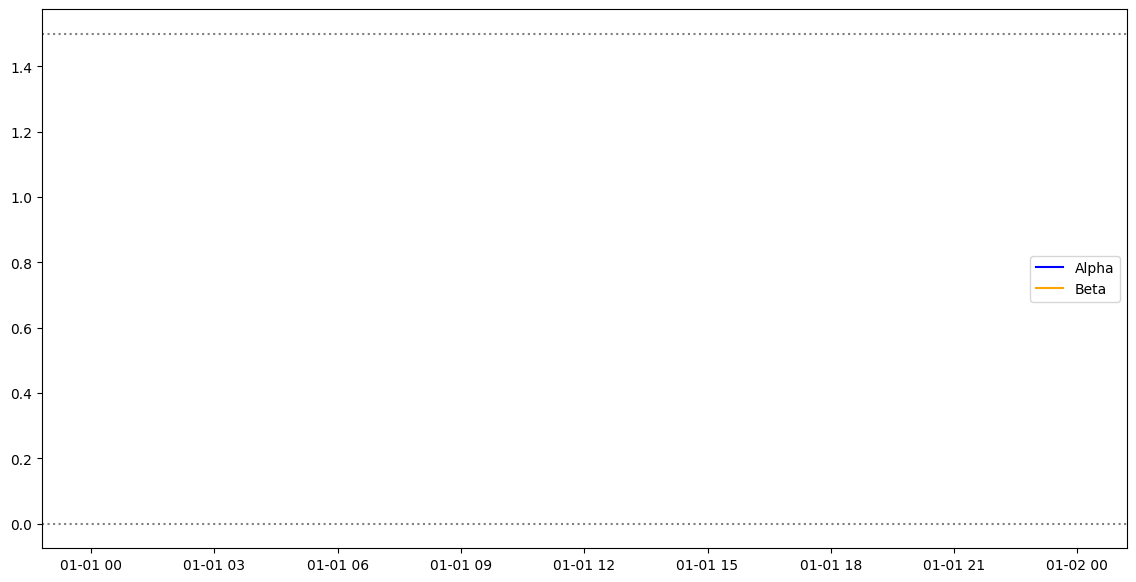

In [1]:
import pandas as pd
import numpy as np

# Veri çerçevesi oluşturma (örnek veri)
data = {
    'date': pd.date_range(start='2023-01-01', periods=300),
    'close': np.random.rand(300) * 100,
    'index_close': np.random.rand(300) * 100
}

df = pd.DataFrame(data)

# Beta ve Alpha hesaplamaları
def calculate_beta_alpha(df, length=300, alpha_period=90):
    # Beta Hesaplama
    df['ret'] = df['close'].pct_change()
    df['retb'] = df['index_close'].pct_change()
    df['secd'] = df['ret'].rolling(window=length).std()
    df['mktd'] = df['retb'].rolling(window=length).std()
    df['beta'] = df['ret'].rolling(window=length).corr(df['retb']) * df['secd'] / df['mktd']

    # Alpha Hesaplama
    df['ret2'] = (df['close'] - df['close'].shift(alpha_period)) / df['close']
    df['retb2'] = (df['index_close'] - df['index_close'].shift(alpha_period)) / df['index_close']
    df['alpha'] = (df['ret2'] - df['retb2'] * df['beta']) * 100

    return df

# Hesaplamaları yap
df = calculate_beta_alpha(df)

# Sonuçları görüntüle
print(df[['date', 'close', 'index_close', 'beta', 'alpha']].tail())

# Görselleştirme (opsiyonel)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['alpha'], label='Alpha', color='blue')
plt.plot(df['date'], df['beta'], label='Beta', color='orange')
plt.axhline(0, color='gray', linestyle='dotted')
plt.axhline(1.5, color='gray', linestyle='dotted')
plt.legend()
plt.show()